In [109]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from CloudSaturation import CloudSaturation

from Utils import *
# Configurator is awailable on
# https://apps.sentinel-hub.com/configurator/#/configurations
# username: koprivec.filip@gmail.com
# password: stefanpass

# If major edits are in order, just create new WMS instance (dont forget to update instanceid)


In [98]:
# Requesting size of Slovenia BB results in error "The bounding box area is too large! Please zoom in."
tulip_box = [52.89906593845727, 4.71038818359375,52.95205098150524, 4.798278808593751]
home_box = [45.96916667, 14.31472222, 46.03416667, 14.35972222]
full_tulip_box = [52.82601970123596, 4.684766350546853,52.93210351553535, 4.860547600546853]
kocevje_box = [convert_to_dd("""45°34'52.69"N"""), convert_to_dd("""14°49'23.05"E"""),convert_to_dd("""45°36'34.31"N"""), convert_to_dd("""14°52'29.75"E""")]
#tulip_box = home_box
# This bounding box is also small enough so that all images are from the same tile -> no problems with cut-off
cloud_sat = CloudSaturation(tulip_box, cloud_scale=6)
kocevje_cloud = CloudSaturation(kocevje_box)
netherlands_cloud = CloudSaturation(full_tulip_box, cloud_scale=6)

In [139]:
mask, true_c, bands, dates, cloud_masks = cloud_sat.get_cloud_saturation_mask()
mask_full, true_c_full, bands, dates_full, cloud_masks_full = netherlands_cloud.get_cloud_saturation_mask()

Saved True color
Saved bands
Downloaded
(100, 99)
Detected
(116, 600, 594)
(116, 589, 589)
(589, 589, 3)
Saved True color
Saved bands
Downloaded
(397, 396)
Detected
(119, 1191, 1188)
(119, 1180, 1180)
(1180, 1180, 3)


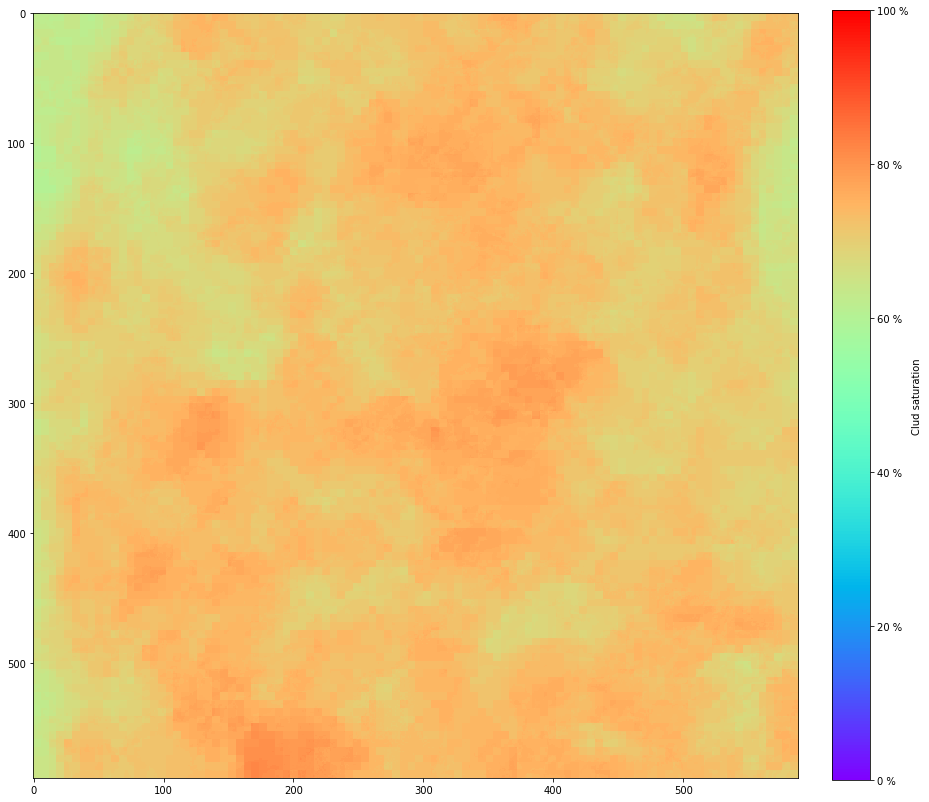

In [32]:
plot_cloud_mask(mask, cmap="rainbow", plot_cmap=True, cmap_frac=0.046)

In [9]:
# Collect sample indices (for the same area)
grayscale = netherlands_cloud.get_full_index_timeseries("MOISTURE-GRAYSCALE2")
ndvi = netherlands_cloud.get_full_index_timeseries("NDVI-GREEN-GRAYSCALE")

In [206]:
# Layers from geopedia that currently work (Also see CloudSaturation.py)
# layers = {'tulip_field_2016':'ttl1904', 'tulip_field_2017':'ttl1905', 'arable_land_2017':'ttl1917'}

# Get dataseries for same region (to reuse cloud data)
field, mask_t, nonzero = cloud_sat.get_tulip_mask("tulip_field_2016")
field_full, mask_full_t, nonzero_full = netherlands_cloud.get_tulip_mask("tulip_field_2016")
# Nonzero contains nonzero indices (tulips ARE on such index), see later code for correst indexing

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=589&width=589&srs=EPSG:3857&bbox=524358.0140363087,6964349.630376049,534141.9536568124,6974133.5699965535
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1180&width=1180&srs=EPSG:3857&bbox=521505.8046283378,6950880.890877021,541073.6838693421,6970448.770118027


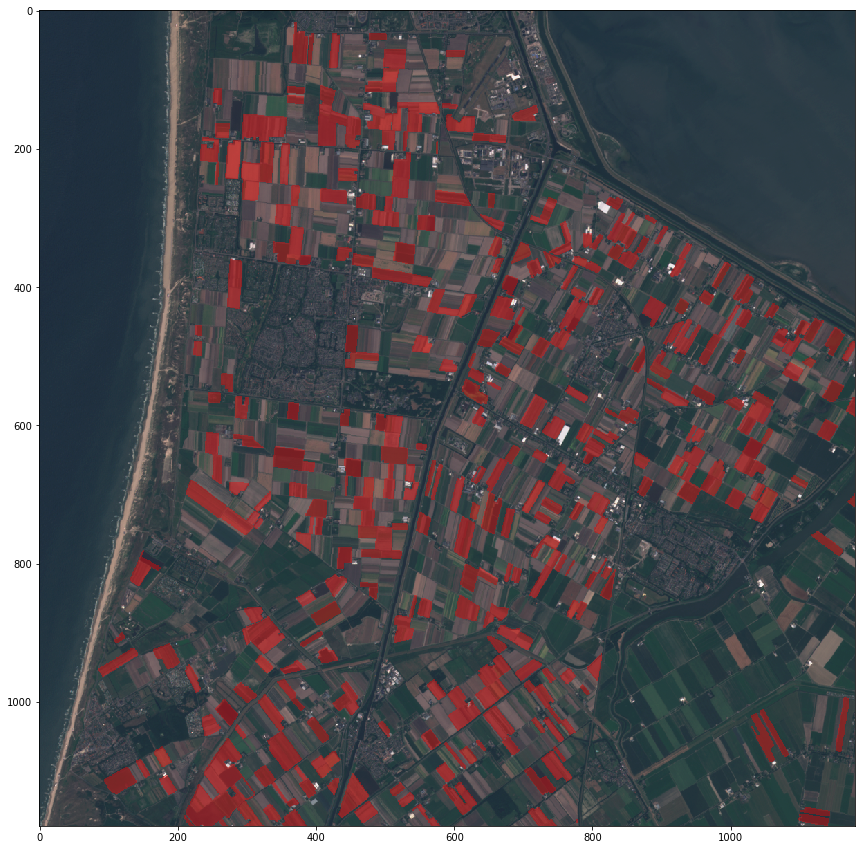

In [203]:
# If mask_maps is not None, for every image in images, each is overlayed with different color
overlay_cloud_mask(true_c_full[0], [mask_full_t], mask_maps = [[255, 0, 0]])

In [116]:
from sklearn.model_selection import train_test_split

In [213]:
def split_train_test_cv(data, train_p=0.5, cv_p=0.5, shuffle=None, state=None):
    if shuffle is 0:
        print("Probably not what you want")
    train, test = train_test_split(data, train_size=train_p, shuffle=shuffle, random_state=state)
    cv, test = train_test_split(test, train_size=cv_p, shuffle=shuffle, random_state=state)
    return train, cv, test

/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


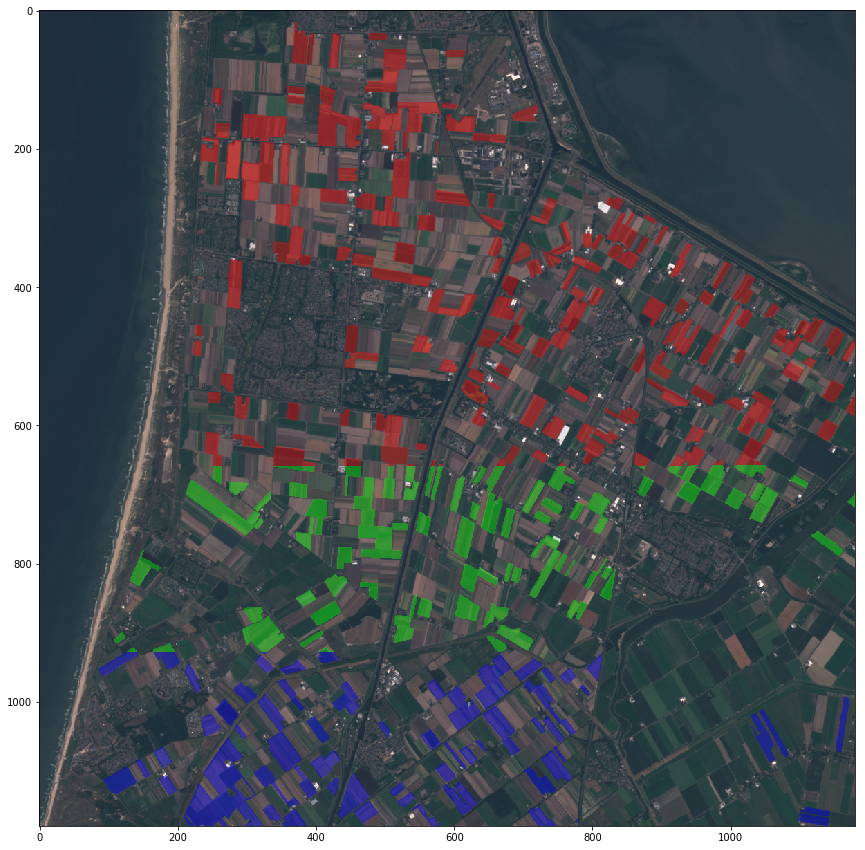

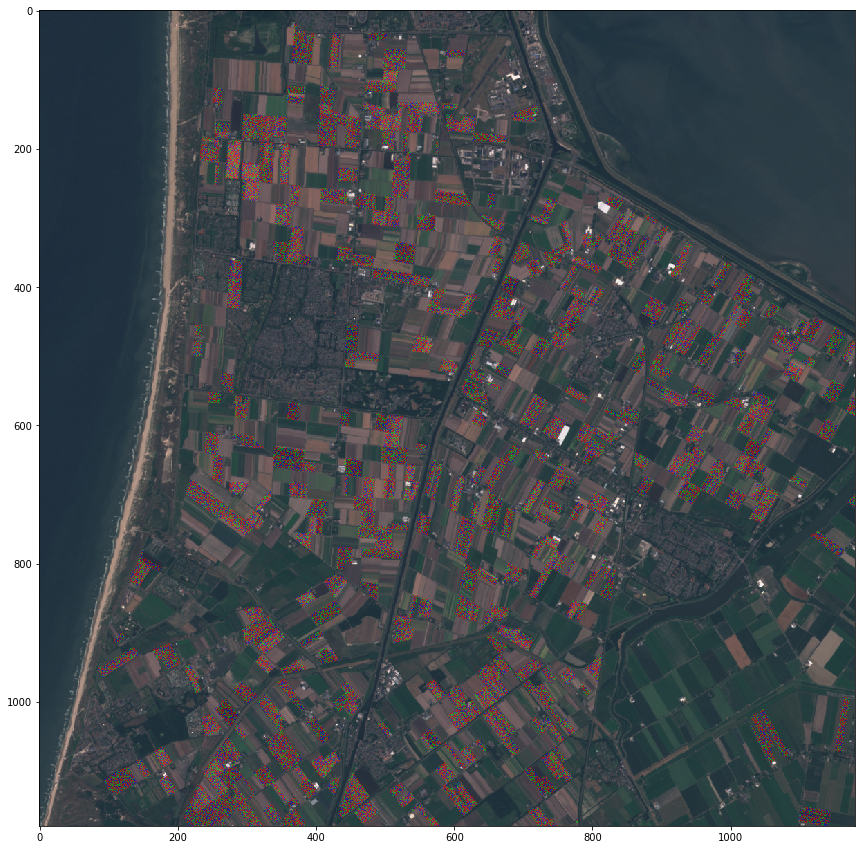

In [209]:
train, cv, test = split_train_test_cv(nonzero_full, shuffle=False)
overlay_cloud_mask(true_c_full[0], [train, cv, test], mask_maps = [[255, 0, 0, 100], [0,255,0], [0,0,255]])
train, cv, test = split_train_test_cv(nonzero_full, shuffle=1)
overlay_cloud_mask(true_c_full[0], [train, cv, test], mask_maps = [[255, 0, 0, 100], [0,255,0], [0,0,255]])
print(len(train))
print(len(cv))
print(len(test))